In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import plot_tree


In [2]:
#Data Loading
Data=pd.read_csv("Occupancy_Estimation.csv")

In [3]:
Data.head(100)


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017/12/22,11:40:45,25.44,25.56,24.94,25.75,155,236,69,54,1.33,0.78,0.18,0.11,485,1.161538,1,1,2
96,2017/12/22,11:41:15,25.44,25.56,24.94,25.81,155,236,70,54,0.17,0.35,0.11,0.07,490,1.380769,0,1,2
97,2017/12/22,11:41:46,25.44,25.56,24.94,25.75,155,237,71,55,0.43,0.36,0.21,0.11,500,1.707692,1,1,2
98,2017/12/22,11:42:16,25.50,25.56,24.88,25.81,155,237,71,55,1.87,0.56,0.23,0.14,500,1.996154,1,1,2


In [4]:
new_data=Data.describe()
new_data

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [6]:
#Check null values in dataset
Data.isnull().any()

Date                    False
Time                    False
S1_Temp                 False
S2_Temp                 False
S3_Temp                 False
S4_Temp                 False
S1_Light                False
S2_Light                False
S3_Light                False
S4_Light                False
S1_Sound                False
S2_Sound                False
S3_Sound                False
S4_Sound                False
S5_CO2                  False
S5_CO2_Slope            False
S6_PIR                  False
S7_PIR                  False
Room_Occupancy_Count    False
dtype: bool

In [7]:
Data.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

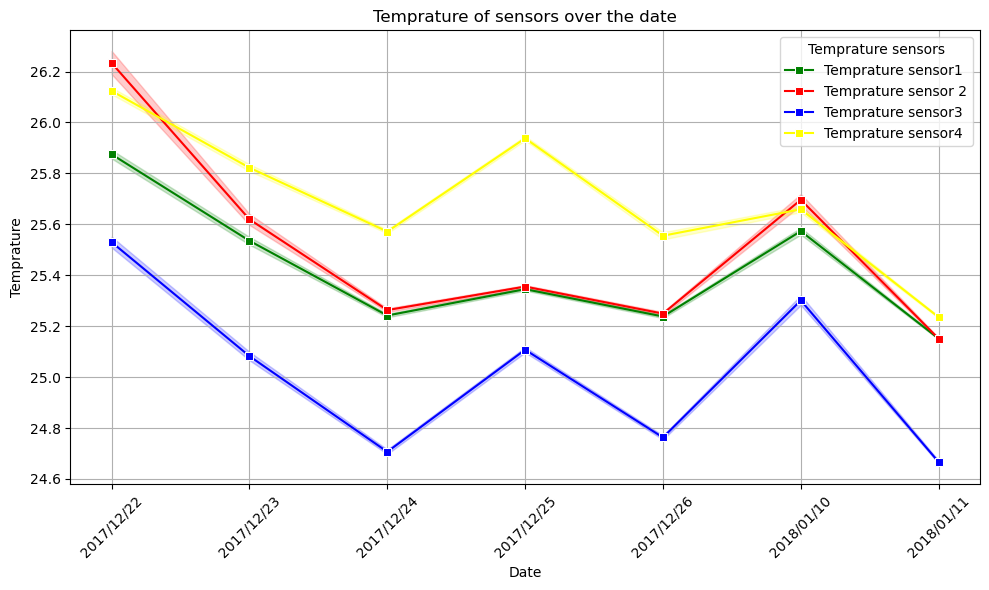

In [8]:
#Visulization Of Four Temprature Sensors# 
#Temprature vs Date
plt.figure(figsize=(10,6))
sns.lineplot(data=Data,x=Data["Date"],y=Data["S1_Temp"],marker="s",label="Temprature sensor1",color="green")
sns.lineplot(data=Data,x=Data["Date"],y=Data["S2_Temp"],marker="s",label="Temprature sensor 2",color="red")
sns.lineplot(data=Data,x=Data["Date"],y=Data["S3_Temp"],marker="s",label="Temprature sensor3",color="blue")
sns.lineplot(data=Data,x=Data["Date"],y=Data["S4_Temp"],marker="s",label="Temprature sensor4",color="yellow")
plt.title("Temprature of sensors over the date")
plt.xlabel("Date")
plt.ylabel("Temprature")
plt.legend(title="Temprature sensors",loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

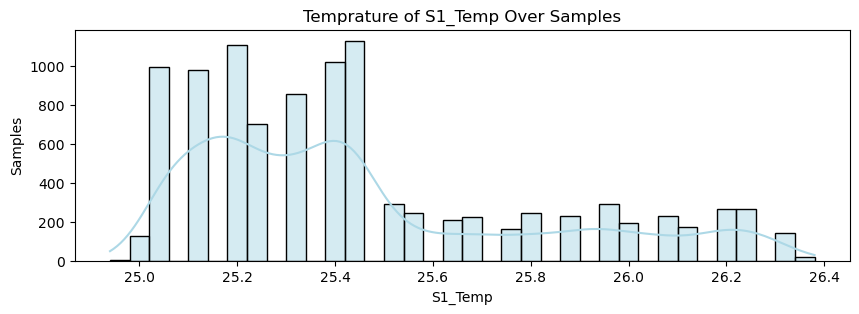

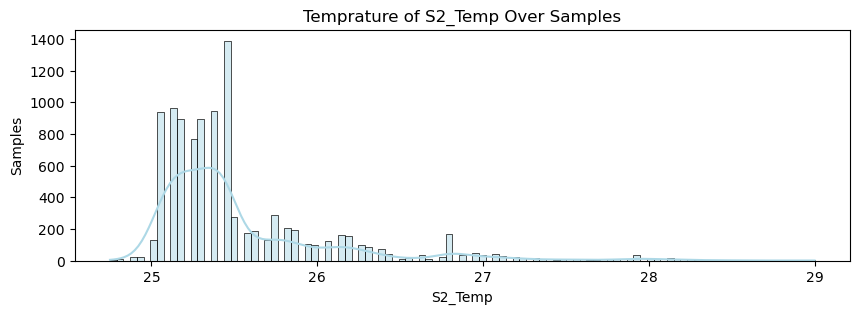

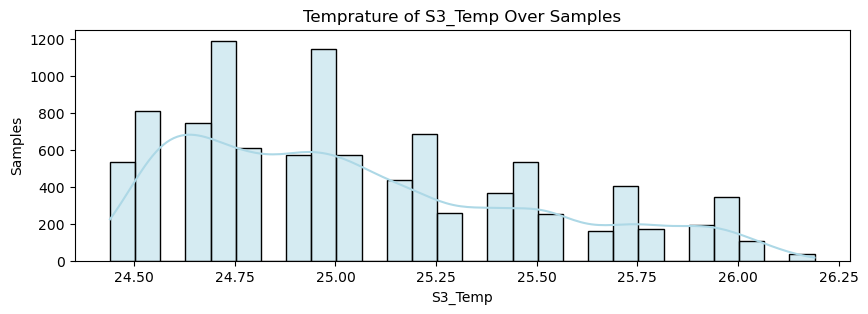

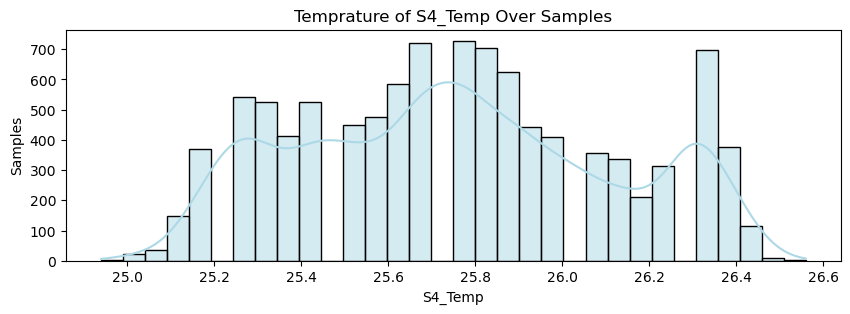

In [9]:
# 2.Temprature vs count  
Temprature_columns=["S1_Temp","S2_Temp","S3_Temp","S4_Temp"]
for l in Temprature_columns:
    plt.figure(figsize=(10,3))
    sns.histplot(Data[l],kde=True,color="lightblue")
    plt.xlabel(f"{l}")
    plt.ylabel("Samples")
    plt.title(f"Temprature of {l} Over Samples")
    plt.show()




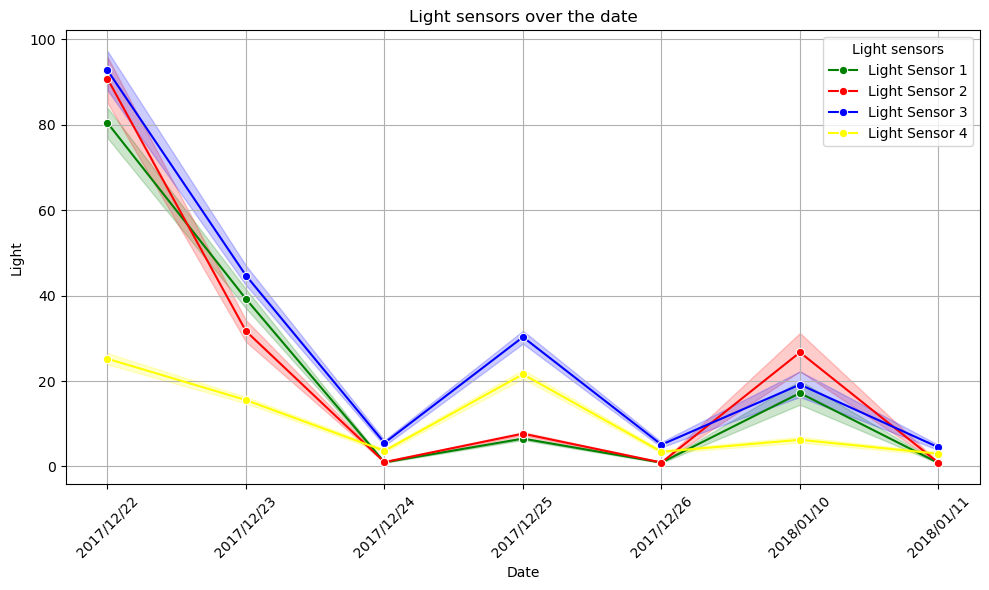

In [10]:
#Visulization Of Four Light Sensors# 
#Light vs Date
plt.figure(figsize=(10,6))
sns.lineplot(data=Data,x=Data["Date"],y=Data["S1_Light"],marker="o",label="Light Sensor 1",color="green")
sns.lineplot(data=Data,x=Data["Date"],y=Data["S2_Light"],marker="o",label="Light Sensor 2",color="red")
sns.lineplot(data=Data,x=Data["Date"],y=Data["S3_Light"],marker="o",label="Light Sensor 3",color="blue")
sns.lineplot(data=Data,x=Data["Date"],y=Data["S4_Light"],marker="o",label="Light Sensor 4",color="yellow")
plt.title("Light sensors over the date")
plt.xlabel("Date")
plt.ylabel("Light")
plt.legend(title="Light sensors",loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

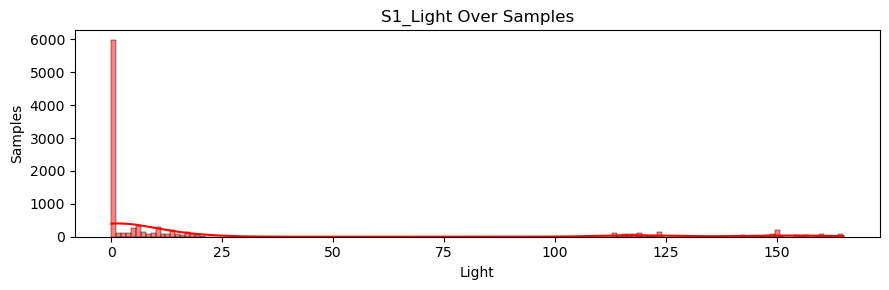

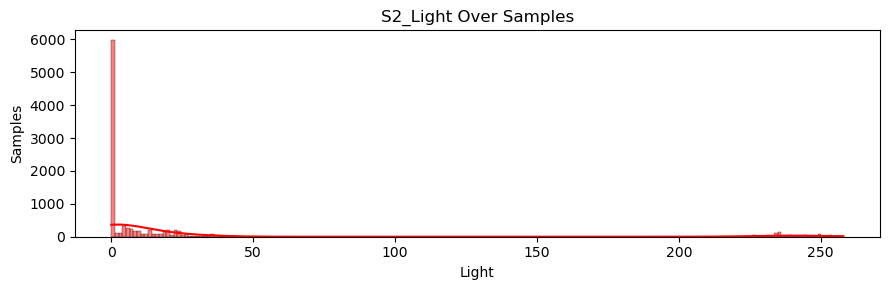

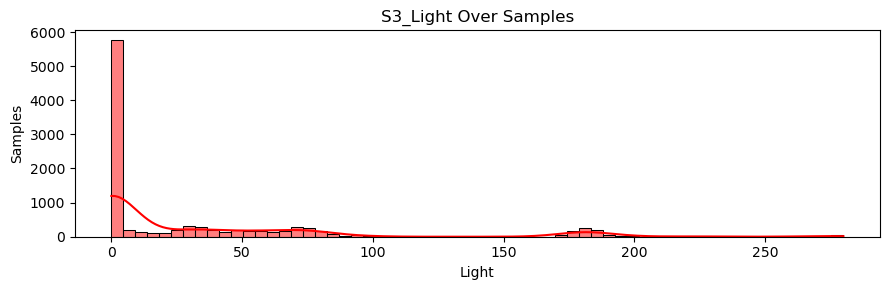

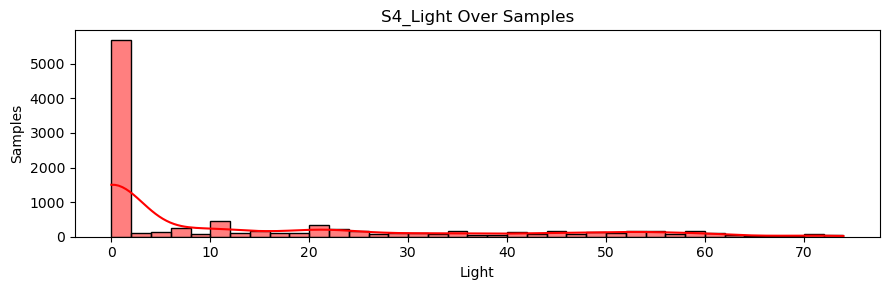

In [11]:
#Visualization Of Light Sensors Over Samples
Light_columns=["S1_Light","S2_Light","S3_Light","S4_Light"]
for i in Light_columns:
    plt.figure(figsize=(9,3))
    sns.histplot(Data[i],kde="True",color='red')
    plt.title(f'{i} Over Samples')
    plt.xlabel('Light')
    plt.ylabel("Samples")
    plt.tight_layout()
    plt.show()


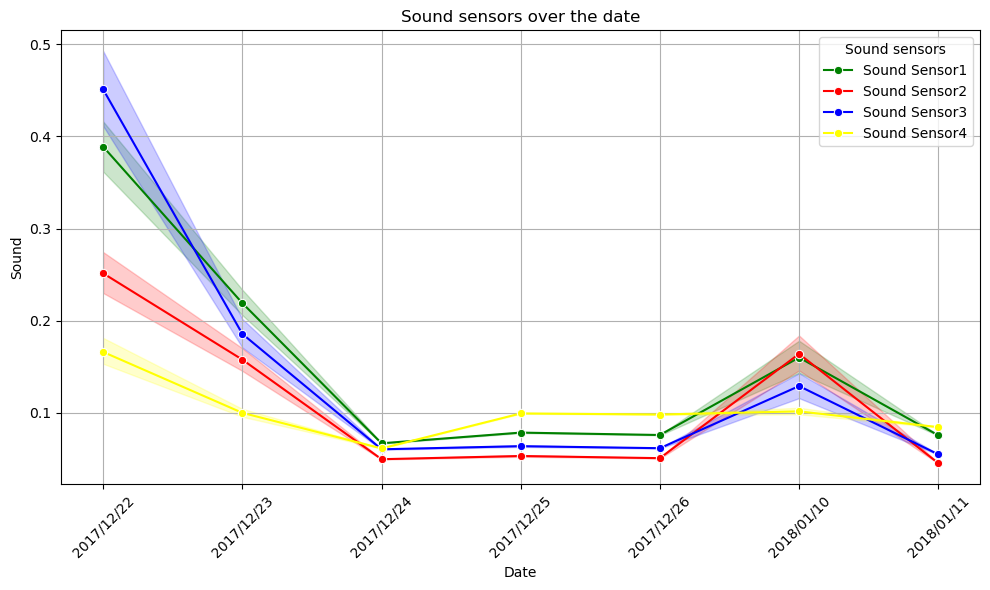

In [12]:
#Visulization Of Four Sound Sensor# 
#Sound Sensors vs Date
plt.figure(figsize=(10,6))
sns.lineplot(data=Data,x=Data["Date"],y=Data["S1_Sound"],marker="o",label='Sound Sensor1',color="green")
sns.lineplot(data=Data,x=Data["Date"],y=Data["S2_Sound"],marker="o",label='Sound Sensor2',color="red")
sns.lineplot(data=Data,x=Data["Date"],y=Data["S3_Sound"],marker="o",label='Sound Sensor3',color="blue")
sns.lineplot(data=Data,x=Data["Date"],y=Data["S4_Sound"],marker="o",label='Sound Sensor4',color="yellow")
plt.title("Sound sensors over the date")
plt.xlabel("Date")
plt.ylabel("Sound")
plt.legend(title="Sound sensors",loc="upper right")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

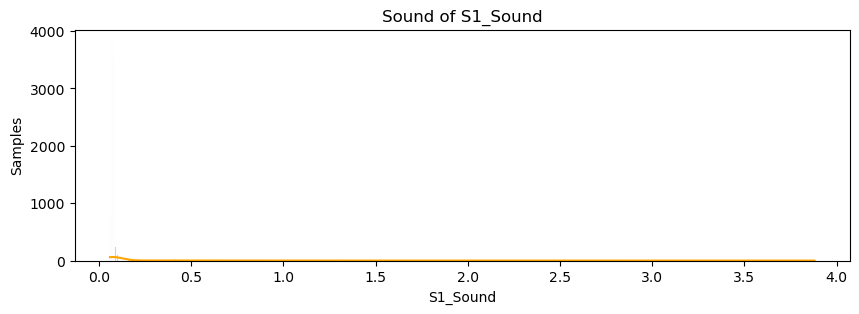

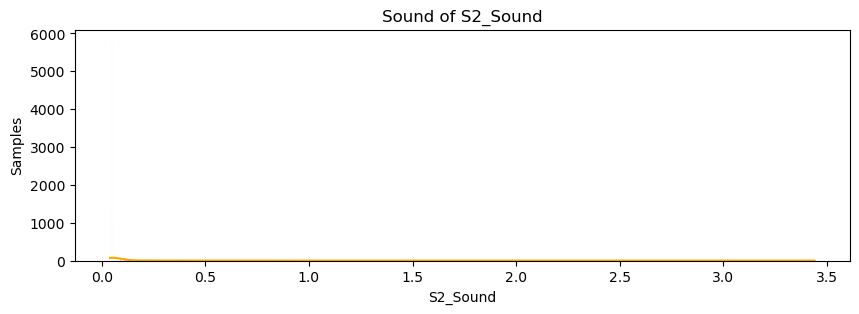

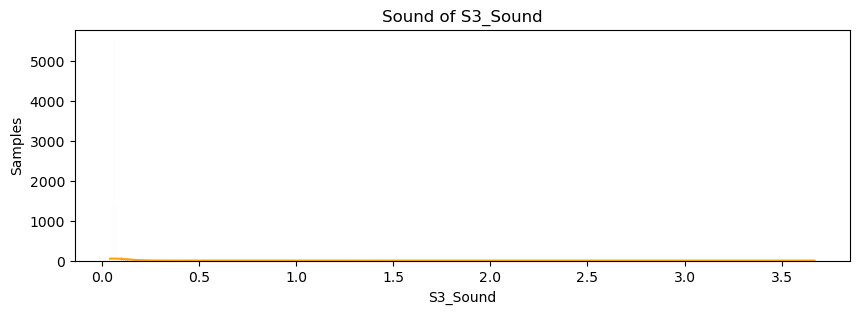

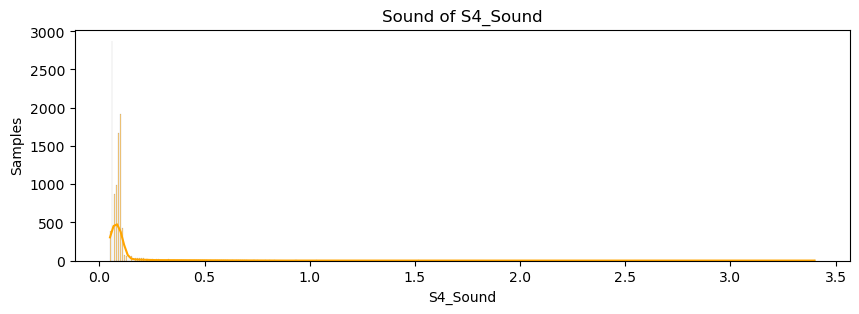

In [13]:
# 2.Sound vs count  
Sound_columns=["S1_Sound","S2_Sound","S3_Sound","S4_Sound"]
for m in Sound_columns:
    plt.figure(figsize=(10,3))
    sns.histplot(Data[m],kde=True,color="orange")
    plt.xlabel(f"{m}")
    plt.ylabel("Samples")
    plt.title(f"Sound of {m}")
    plt.show()


In [14]:
#Combine date and time
Data["Timestamp"]=pd.to_datetime(Data["Date"]+' '+Data["Time"])
Data["Timestamp"]


0       2017-12-22 10:49:41
1       2017-12-22 10:50:12
2       2017-12-22 10:50:42
3       2017-12-22 10:51:13
4       2017-12-22 10:51:44
                ...        
10124   2018-01-11 08:58:07
10125   2018-01-11 08:58:37
10126   2018-01-11 08:59:08
10127   2018-01-11 08:59:39
10128   2018-01-11 09:00:09
Name: Timestamp, Length: 10129, dtype: datetime64[ns]

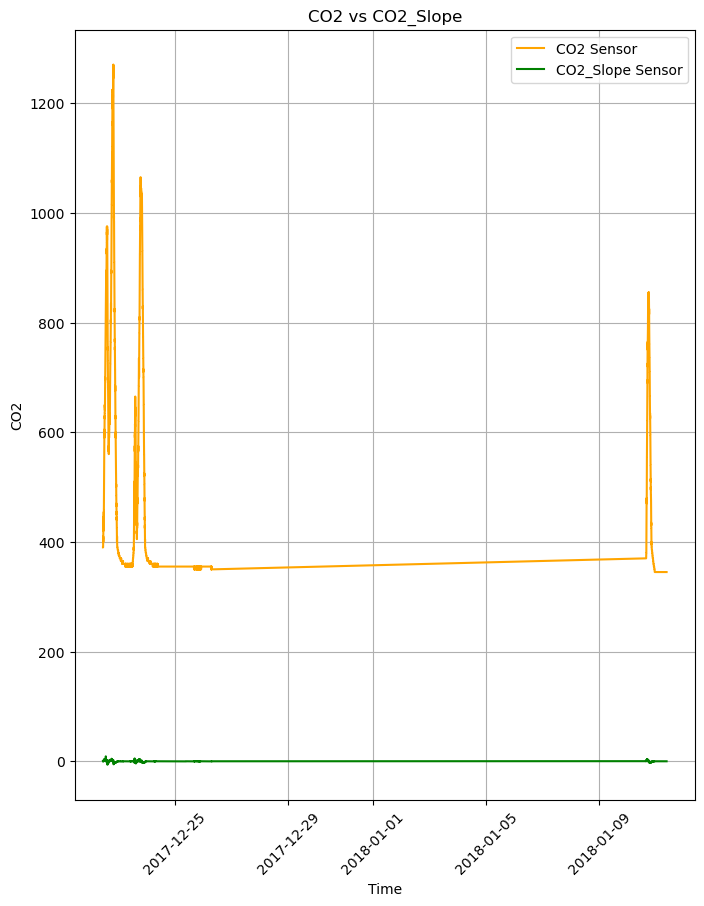

In [15]:
#CO2 Sensor vs time
plt.figure(figsize=(8,10))
plt.plot(Data["Timestamp"],Data["S5_CO2"],label="CO2 Sensor",color="orange")
plt.plot(Data["Timestamp"],Data["S5_CO2_Slope"],label="CO2_Slope Sensor",color="green")
plt.xlabel("Time")
plt.ylabel("CO2")
plt.title("CO2 vs CO2_Slope")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [16]:
Data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Timestamp
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,2017-12-22 10:49:41
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,2017-12-22 10:50:12
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,2017-12-22 10:50:42
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,2017-12-22 10:51:13
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,2017-12-22 10:51:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0,2018-01-11 08:58:07
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0,2018-01-11 08:58:37
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0,2018-01-11 08:59:08
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0,2018-01-11 08:59:39


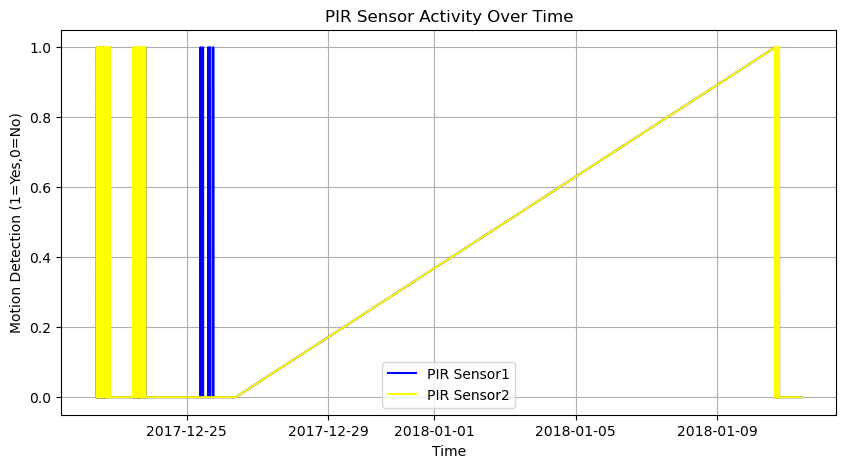

In [17]:
#PIR Sensor plot 
plt.figure(figsize=(10,5))
plt.plot(Data['Timestamp'],Data['S6_PIR'],label='PIR Sensor1',color='blue')
plt.plot(Data['Timestamp'],Data['S7_PIR'],label='PIR Sensor2',color='yellow')
plt.xlabel("Time")
plt.ylabel("Motion Detection (1=Yes,0=No)")
plt.title("PIR Sensor Activity Over Time")
plt.legend()
plt.grid(True)
plt.show()


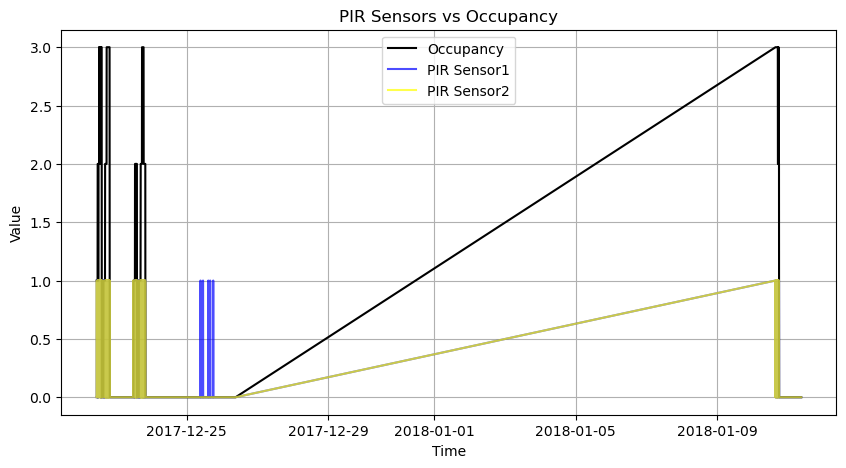

In [18]:
#Plot Occupancy
plt.figure(figsize=(10,5))
plt.plot(Data["Timestamp"],Data['Room_Occupancy_Count'],label="Occupancy",color="black")
plt.plot(Data['Timestamp'],Data['S6_PIR'],label='PIR Sensor1',color='blue',alpha=0.7)
plt.plot(Data['Timestamp'],Data['S7_PIR'],label='PIR Sensor2',color='yellow',alpha=0.7)
plt.xlabel("Time")
plt.ylabel('Value')
plt.title("PIR Sensors vs Occupancy")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#Correlation
correlation= Data[["S1_Temp","S2_Temp","S3_Temp","S4_Temp","S1_Light","S2_Light","S3_Light","S4_Light",
                   "S1_Sound","S2_Sound","S3_Sound","S4_Sound","S5_CO2","S5_CO2_Slope","S6_PIR","S7_PIR"]].corr()

<Axes: >

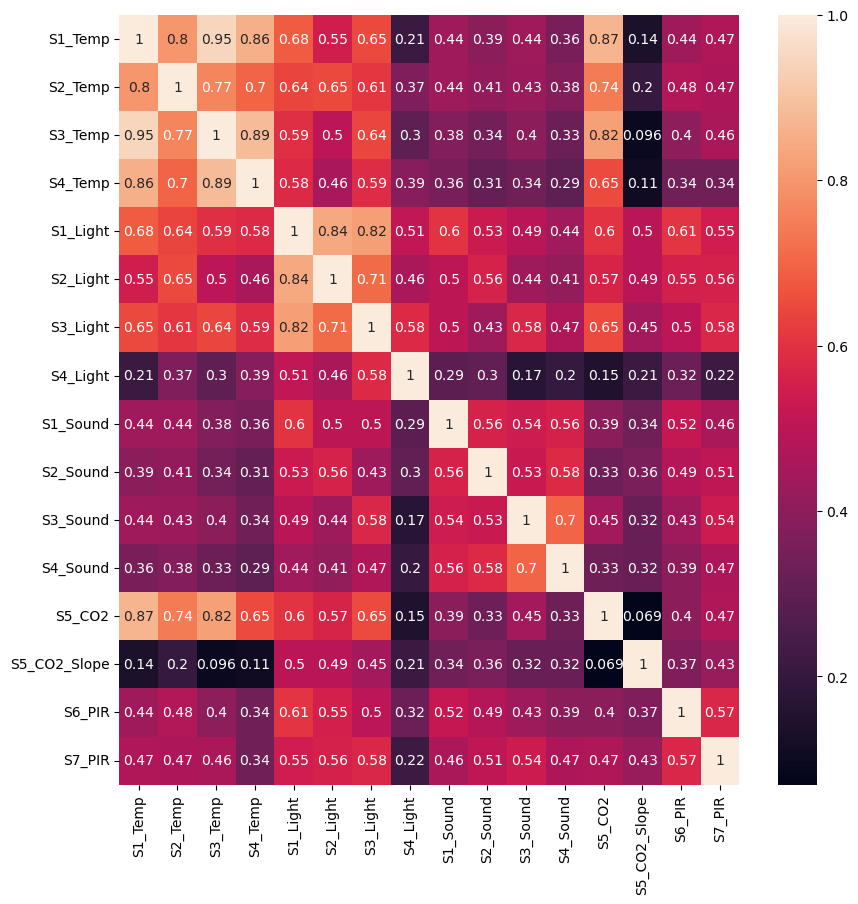

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)

In [21]:
#Key Observations:
 #Highly correlated in temprature sensor
     #S1,S2,S3,S4 temprature are strongly correlated that is (0.77 - 0.95)
     #Suggesting similar reading accross the room
 #Light and sound sensors show moderate to high correlation within their groups
    #S1_light to S4_light likely(0.46 -0.86) capture similar lighting patterns.
    #S1_sound to S4_sound also correlate(0.56-0.7) possibly due to shared noise environments.
 #CO2 and CO2Slope shows very low positive correlation(0.06),almost no linear realationship
 #PIR_6 and PIR_7 have low correlation with most other sensors,
 #It is means they provide unique motion detection based information useful for detecting presence


In [22]:
#Manipulation in dataset
#1.Average value of temprature sensors
Data["Average_temp"]=Data[["S1_Temp","S2_Temp","S3_Temp","S4_Temp"]].mean(axis=1)
Data["Average_temp"]

0        24.9075
1        24.9225
2        24.9225
3        24.9375
4        24.9375
          ...   
10124    25.0475
10125    25.0150
10126    25.0325
10127    25.0325
10128    25.0325
Name: Average_temp, Length: 10129, dtype: float64

In [23]:
#2.Average value of Light sensors
Data["Average_Light"]=Data[["S1_Light","S2_Light","S3_Light","S4_Light"]].mean(axis=1)
Data["Average_Light"]

0        62.00
1        61.75
2        62.00
3        62.00
4        62.25
         ...  
10124    17.00
10125    17.25
10126    17.25
10127    17.25
10128    17.25
Name: Average_Light, Length: 10129, dtype: float64

In [24]:
#3.Average value of sound sensors
Data["Average_Sound"]=Data[["S1_Sound","S2_Sound","S3_Sound","S4_Sound"]].mean(axis=1)
Data["Average_Sound"]

0        0.0975
1        0.2750
2        0.1700
3        0.1750
4        0.0900
          ...  
10124    0.0675
10125    0.0625
10126    0.0750
10127    0.0850
10128    0.0675
Name: Average_Sound, Length: 10129, dtype: float64

In [25]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  10129 non-null  object        
 1   Time                  10129 non-null  object        
 2   S1_Temp               10129 non-null  float64       
 3   S2_Temp               10129 non-null  float64       
 4   S3_Temp               10129 non-null  float64       
 5   S4_Temp               10129 non-null  float64       
 6   S1_Light              10129 non-null  int64         
 7   S2_Light              10129 non-null  int64         
 8   S3_Light              10129 non-null  int64         
 9   S4_Light              10129 non-null  int64         
 10  S1_Sound              10129 non-null  float64       
 11  S2_Sound              10129 non-null  float64       
 12  S3_Sound              10129 non-null  float64       
 13  S4_Sound        

In [26]:
#list the columns 
columns=Data.columns.tolist()
#4.Mostly correlated data are remove from data set
Data=Data.drop(columns=["Date","Time","S1_Temp","S2_Temp","S3_Temp","S4_Temp","S1_Light","S2_Light","S3_Light","S4_Light","S1_Sound","S2_Sound",
                         "S3_Sound","S4_Sound"])


In [27]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   S5_CO2                10129 non-null  int64         
 1   S5_CO2_Slope          10129 non-null  float64       
 2   S6_PIR                10129 non-null  int64         
 3   S7_PIR                10129 non-null  int64         
 4   Room_Occupancy_Count  10129 non-null  int64         
 5   Timestamp             10129 non-null  datetime64[ns]
 6   Average_temp          10129 non-null  float64       
 7   Average_Light         10129 non-null  float64       
 8   Average_Sound         10129 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 712.3 KB


In [28]:
#5.Change the columns 
#step1-remove reqiured columns from the data set

columns=Data.columns.tolist()
columns.remove("Timestamp")
columns.remove("Room_Occupancy_Count")


In [29]:
#Step2- Add columns in required format
new_order=["Timestamp"]+columns+["Room_Occupancy_Count"]

Data=Data[new_order]

In [30]:
Data.head()

,Timestamp,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Average_temp,Average_Light,Average_Sound,Room_Occupancy_Count
0,2017-12-22 10:49:41,390,0.769231,0,0,24.9075,62.00,0.0975,1
1,2017-12-22 10:50:12,390,0.646154,0,0,24.9225,61.75,0.2750,1
2,2017-12-22 10:50:42,390,0.519231,0,0,24.9225,62.00,0.1700,1
3,2017-12-22 10:51:13,390,0.388462,0,0,24.9375,62.00,0.1750,1
4,2017-12-22 10:51:44,390,0.253846,0,0,24.9375,62.25,0.0900,1


In [31]:
#Convert into datetime format
Data["Timestamp"]=pd.to_datetime(Data["Timestamp"])
#extract useful data from timestamp
Data["hour"]=Data["Timestamp"].dt.hour
Data["day_of_week"]=Data["Timestamp"].dt.dayofweek
Data["is_weekened"]=Data["day_of_week"].apply(lambda x:1 if x>=5 else 0)



In [32]:
#drop the original timestamp
Data.drop(columns="Timestamp",inplace=True)
Data.head()

,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Average_temp,Average_Light,Average_Sound,Room_Occupancy_Count,hour,day_of_week,is_weekened
0,390,0.769231,0,0,24.9075,62.00,0.0975,1,10,4,0
1,390,0.646154,0,0,24.9225,61.75,0.2750,1,10,4,0
2,390,0.519231,0,0,24.9225,62.00,0.1700,1,10,4,0
3,390,0.388462,0,0,24.9375,62.00,0.1750,1,10,4,0
4,390,0.253846,0,0,24.9375,62.25,0.0900,1,10,4,0


C:\Users\Mashtrix\AppData\Local\Temp\ipykernel_2712\2527008588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Data,x="day_of_week",y="Room_Occupancy_Count",palette="coolwarm")


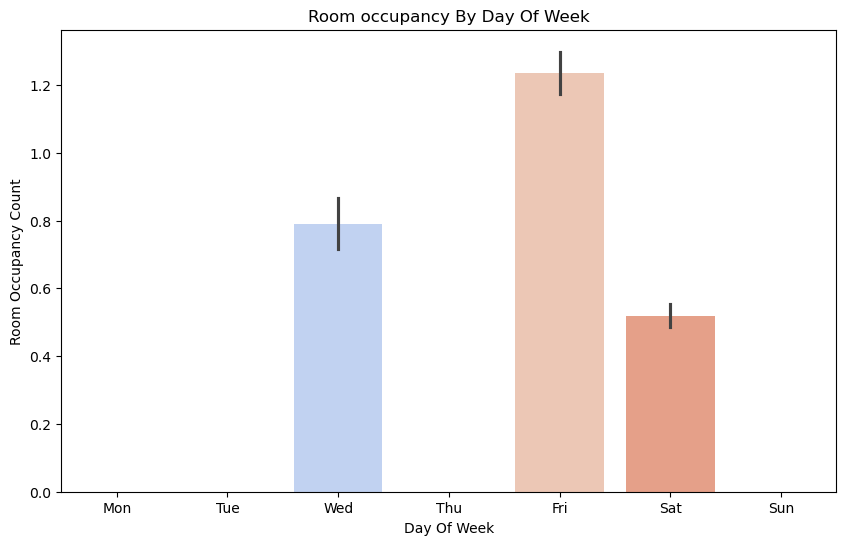

In [33]:
#1.Room Occupancy vs Day Of Week
plt.figure(figsize=(10,6))
sns.barplot(data=Data,x="day_of_week",y="Room_Occupancy_Count",palette="coolwarm")
#label days
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.title("Room occupancy By Day Of Week")
plt.xlabel("Day Of Week")
plt.ylabel("Room Occupancy Count")
plt.show()


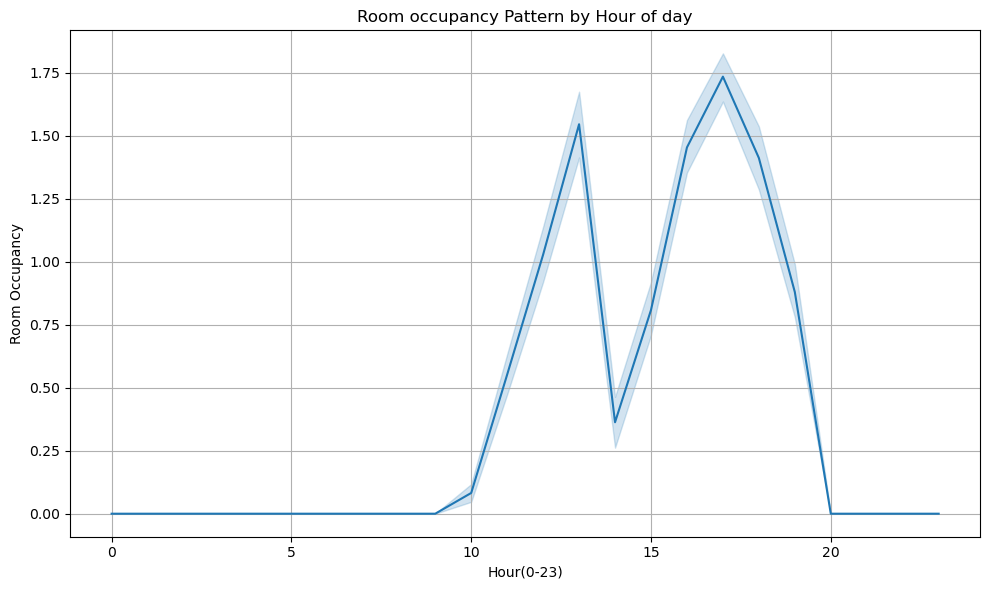

In [34]:
#2.Hourly Occupancy Pattern(All Days Combined)
plt.figure(figsize=(10,6))
sns.lineplot(data=Data,x="hour",y="Room_Occupancy_Count")
plt.title("Room occupancy Pattern by Hour of day")
plt.xlabel("Hour(0-23)")
plt.ylabel("Room Occupancy")
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
#5.Change the columns 
#step1-remove reqiured columns from the data set

columns=Data.columns.tolist()
columns.remove("Room_Occupancy_Count")


In [37]:
#Step2- Add columns in required format
new_order1=columns+["Room_Occupancy_Count"]

Data=Data[new_order1]
Data

,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Average_temp,Average_Light,Average_Sound,hour,day_of_week,is_weekened,Room_Occupancy_Count
0,390,0.769231,0,0,24.9075,62.00,0.0975,10,4,0,1
1,390,0.646154,0,0,24.9225,61.75,0.2750,10,4,0,1
2,390,0.519231,0,0,24.9225,62.00,0.1700,10,4,0,1
3,390,0.388462,0,0,24.9375,62.00,0.1750,10,4,0,1
4,390,0.253846,0,0,24.9375,62.25,0.0900,10,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10124,345,0.000000,0,0,25.0475,17.00,0.0675,8,3,0,0
10125,345,0.000000,0,0,25.0150,17.25,0.0625,8,3,0,0
10126,345,0.000000,0,0,25.0325,17.25,0.0750,8,3,0,0
10127,345,0.000000,0,0,25.0325,17.25,0.0850,8,3,0,0


In [38]:
#seperate the input and output data
X=Data.iloc[:,:-1].values
Y=Data.iloc[:,-1].values

In [39]:
#train data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [40]:
X_train

array([[ 3.60000000e+02,  0.00000000e+00,  0.00000000e+00, ...,
         4.00000000e+00,  5.00000000e+00,  1.00000000e+00],
       [ 3.65000000e+02,  0.00000000e+00,  0.00000000e+00, ...,
         2.00000000e+00,  6.00000000e+00,  1.00000000e+00],
       [ 5.30000000e+02, -2.59230769e+00,  0.00000000e+00, ...,
         1.90000000e+01,  2.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.55000000e+02,  0.00000000e+00,  0.00000000e+00, ...,
         9.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.16000000e+03,  3.16538462e+00,  0.00000000e+00, ...,
         1.80000000e+01,  4.00000000e+00,  0.00000000e+00],
       [ 3.55000000e+02,  0.00000000e+00,  0.00000000e+00, ...,
         2.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [41]:
Y_train

array([0, 0, 0, ..., 0, 3, 0], dtype=int64)

In [42]:

model=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=3,random_state=42)
model.fit(X_train,Y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [43]:

y_pred=model.predict(X_test)
df=pd.DataFrame(y_pred,Y_test)
df

,0
0,0
1,1
0,0
0,0
0,0
...,...
0,0
2,2
0,0
0,0


In [44]:
cm=confusion_matrix(Y_test,y_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[1616    0    1    2]
 [   6   97    0    0]
 [   0    1  152   11]
 [   5    0    2  133]]


In [45]:
print(f"Accuracy Score",accuracy_score(y_pred,Y_test)*100,"%")

Accuracy Score 98.61796643632775 %


In [46]:
#single value prediction
prediction=model.predict([[345,0.000000,0,0,25.0475,17.00,0.0675,8,3,0]])
prediction

array([0], dtype=int64)

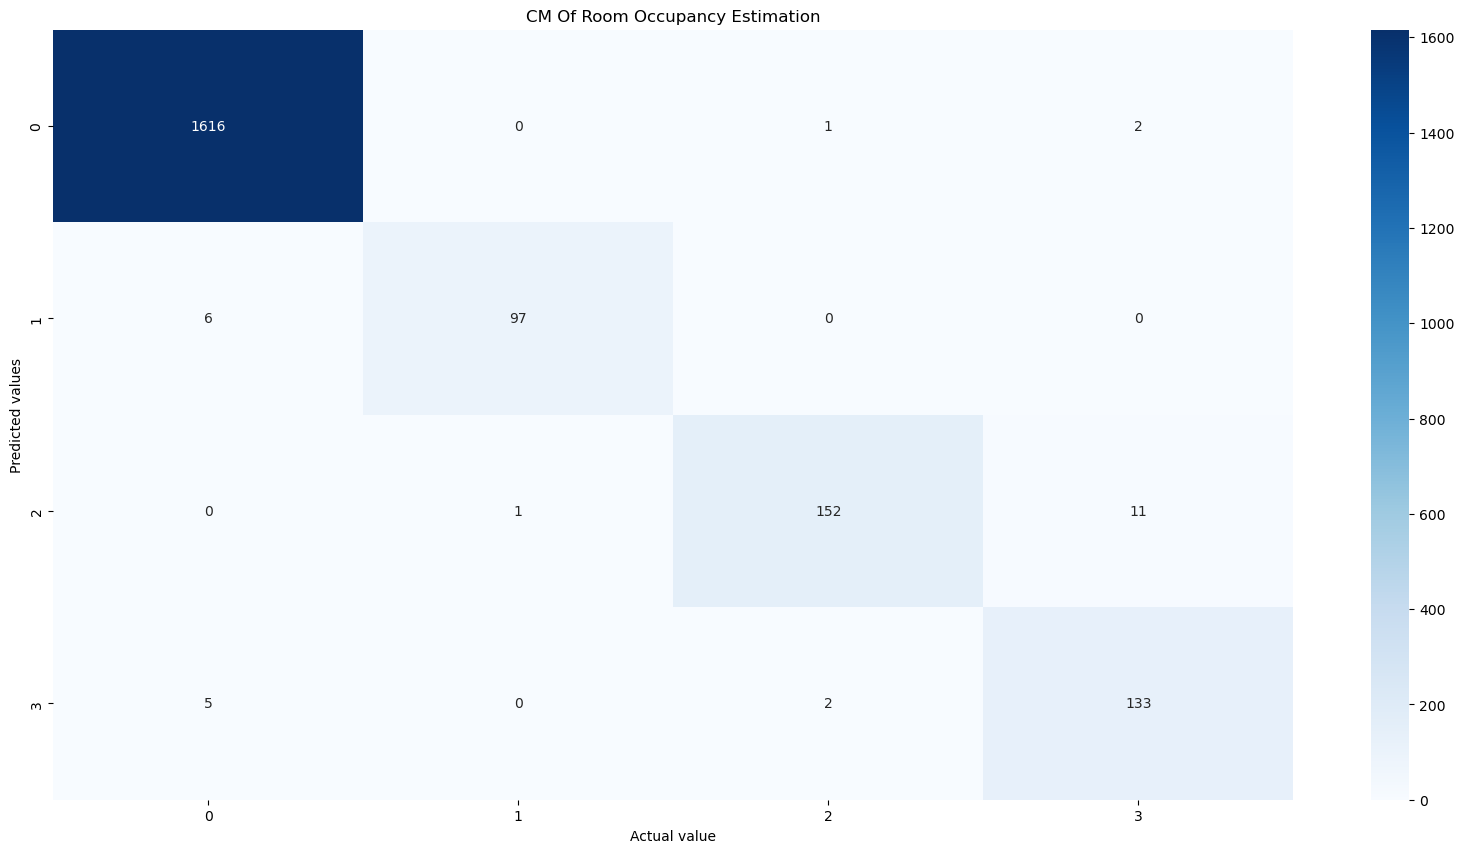

In [47]:
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True,cmap="Blues",fmt='d')
plt.title("CM Of Room Occupancy Estimation")
plt.xlabel("Actual value")
plt.ylabel("Predicted values")
plt.show()